In [2]:
# plot_flocs_aug_runs.ipynb
# poached from ROMS 3D Temperature notebook
from pylab import *
cas = 70
url = 'http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/aretxabaleta/MVCO/ocean_his_{0:}.nc'.format(cas)
# identify computer and set path names
print url

http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/aretxabaleta/MVCO/ocean_his_70.nc


In [5]:
import os
import platform
computer_name = platform.uname()[1]
print computer_name

igsagiegltcsh72


In [9]:
if computer_name=='igsagiegwscshl0':
    print 'CRS Ubuntu desktop'
    src_dir = r"/home/csherwood-pr/crs/src/"
    proj_dir = r"/home/csherwood-pr/crs/proj/"
    # case directory
    #case_dir = r'os_flocruns/steady_floc/'
    #case_dir = r'os_flocruns/wave_tide/'
    case_dir = r'os_flocruns/aug_runs/'
    #case_dir = r'os_flocruns/tide_floc/'
elif computer_name=='igsagiegltcsh72':
    print 'CRS laptop'
    src_dir = r"C:/crs/src/"
    proj_dir = r"C:/crs/proj/"
    # case directory
    case_dir = r'flocs/os_flocs/'
elif computer_name=='IGSAGIEGWSCSH70':
    print 'CRS desktop'
    src_dir = r"D:/crs/src/"
    proj_dir = r"D:/crs/proj/"
    # case directory
    case_dir = r'flocs/aug_runs/'
else :
    print "unknown computer"

########################
# run name
# run_name = 'os051q'

# plot results from several runs
# read data from GLS run, which has diffusivity for conc enabled
flist = ['os050qg','os051qg','os052qg','os053qg','os054qg']
run_name = flist[0]
########################

# import local ROMS and CRS packages
import sys
sys.path.append(src_dir+r'octant/octant')
sys.path.append(src_dir+r'py')
sys.path.append(src_dir+r'crspy')
import depths as dp
import crspy as crspy
import netCDF4

print "Opening ",url
nc = netCDF4.Dataset(url)

# open a summary stats file
stats_filename = proj_dir+case_dir+run_name+'_summary.txt'
print "Stats filename: ",stats_filename
s="{0:s}\n".format(stats_filename)
s=s+"{0:s}\n".format("URL: "+url)
with open( stats_filename, "w") as afile:
    afile.write(s)
    
# read vertical grid parameters
Vtransform = nc.variables['Vtransform'][:]
Vstretching = nc.variables['Vstretching'][:]
print 'Vtransform: ',Vtransform,' Vstretching: ',Vstretching
s_rho = nc.variables['s_rho'][:]
s_w = nc.variables['s_w'][:]
Cs_r = nc.variables['Cs_r'][:]
Cs_w = nc.variables['Cs_w'][:]
N = len(s_rho)
Np = len(s_w)
s= 'N  = len(s_rho): {0}, Np = len(s_w) : {1}\n'.format(len(s_rho),len(s_w))

# print nc.variables['s_rho'] # get all the netCDF info
theta_s = nc.variables['theta_s'][:]
theta_b = nc.variables['theta_b'][:]
depth_c = nc.variables['hc'][:]

s = s+'hc = {0}\n'.format(depth_c)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
# here is the formula for calculating the depth parameter
a=theta_s
b=theta_b
sr = s_rho
C = (1-b)*sinh(a*sr)/sinh(a) + b*[tanh(a*(sr+0.5))/(2*tanh(0.5*a)) - 0.5]

CRS laptop
Opening  http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/aretxabaleta/MVCO/ocean_his_70.nc
Stats filename:  C:/crs/proj/flocs/os_flocs/os050qg_summary.txt
Vtransform:  1  Vstretching:  1
N  = len(s_rho): 50, Np = len(s_w) : 51

N  = len(s_rho): 50, Np = len(s_w) : 51
hc = 0.0



ValueError: operands could not be broadcast together with shapes (50,) (0,) 

Intial zeta: 0.0, max. deviation: 7.12948536424e-14



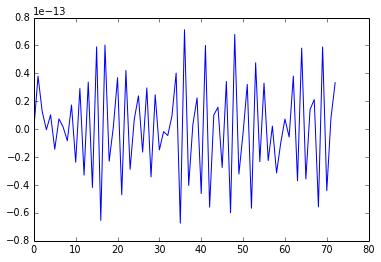

In [2]:
# read water depth
h = nc.variables['h'][3,4]
hc = nc.variables['hc'][:]
zeta = nc.variables['zeta'][:,3,4]
s='Intial zeta: {0}, max. deviation: {1}\n'.format(zeta[0],max(abs(zeta-zeta[0])))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
plot(zeta)

In [3]:
# use Rob Hetland's depths.py functions
zw = dp.get_zw(Vtransform=Vtransform, Vstretching=Vstretching, N=N+1, \
    theta_s=theta_s, theta_b=theta_b, h=h, hc=hc, zeta=0, Hscale=3)
z = dp.get_zrho(Vtransform=Vtransform, Vstretching=Vstretching, N=N, \
    theta_s=theta_s, theta_b=theta_b, h=h, hc=hc, zeta=0, Hscale=3)

time = nc.variables['ocean_time'][:]
nt = len(time)
nz = len(z)
nzw = len(zw)
dz = diff(zw)
s = "nt, nz, nzw: {0}, {1}, {2}\n".format(nt,nz,nzw)
s = s+"Final time: {0} hrs.\n".format(time[-1]/3600.)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)

dz2d = tile(dz,(nt,1))
print 'shape(dz2d) = ',shape( dz2d )
#print zw
#print dz

nt, nz, nzw: 73, 50, 51
Final time: 12.0 hrs.

shape(dz2d) =  (73L, 50L)


In [4]:

#savetxt(proj_dir+case_dir+run_name+'fdiam.txt',fdiam)
#savetxt(proj_dir+case_dir+run_name+'ws.txt',ws)

fdiam = 1e6*nc.variables['Sd50'][:]
ws = 1e3*nc.variables['Wsed'][:]
print(ws)
print(fdiam)

[ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.1]
[  50.      60.007   72.017   86.43   103.728  124.488  149.403  179.304
  215.19   258.258  309.945  371.977  446.424  535.771  643.     150.   ]


Shape of fdiam, ws: (16L,), (16L,)Using ncs = 15
Shape(mud) = (73L, 50L, 15L)
Intial mass: 12.0 kg/m2. Change: -0.0037
Max. abs. change in mud inventory: 0.0130373123755

D:/crs/proj/flocs/aug_runs/case_os050qgmass_change.png


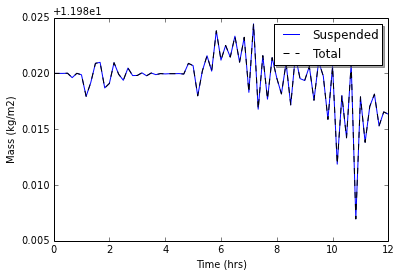

In [5]:
# check mass conservation of suspended NCS classes only
# (last class in these runs is sand)
fdiam = 1e6*nc.variables['Sd50'][:]
ws = 1e3*nc.variables['Wsed'][:]

ncs = 15
s = "Shape of fdiam, ws: {0}, {1}".format(shape(fdiam),shape(ws))
s = s+ "Using ncs = {0}".format(ncs)
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
    
mud = zeros((nt,nz,ncs))
for i in range(0,ncs) :
    v = 'mud[:,:,'+str(i)+'] = '
    m = 'mud_'+ '%(i)02d' % {"i":i+1}  # use formatting to get mud_01
    c =  v+r"nc.variables['" +m+ r"'][:,:,3,4]"
    #print c                          # c is the command that will be executed
    exec(c)
    
s = 'Shape(mud) = {0}'.format(shape(mud))

mmud = sum(mud,2)*dz2d          
initial_mass = sum(mmud[0,:])
final_mass = sum(mmud[nt-1,:])
summud_ts = sum(mmud,axis=1)
max_mud_change = max( abs( summud_ts[:]-summud_ts[0] ))

s=s+"\nIntial mass: {0} kg/m2. Change: {1:7.4f}".format(initial_mass,final_mass-initial_mass)
s=s+'\nMax. abs. change in mud inventory: {0}\n'.format(max_mud_change )
print s
with open( stats_filename, "a") as afile:
    afile.write(s)
    
if( max_mud_change > 1e-8 ):
    # Make a plot if mass is not conserved5
    fig, ax = plt.subplots()
    ax.plot(time/3600., sum(mmud,1), 'b', label='Suspended')
    ax.plot(time/3600., sum(mmud,1), 'k--', label='Total' )
    legend = ax.legend(loc = 'upper right', shadow=True)
    plt.ylabel('Mass (kg/m2)')
    plt.xlabel('Time (hrs)')
    fig_name = proj_dir+case_dir+'case_'+run_name+'mass_change.png'
    print fig_name
    plt.savefig(fig_name)

shape(zw): (51L,)
(shape(tw2d): (73L, 51L)
(shape(zw2d): (73L, 51L)

shape(ws_av)  (73L, 50L)
shape(mconc)  (73L, 50L)
D:/crs/proj/flocs/aug_runs/case_os050qgconc_diam_ws.png


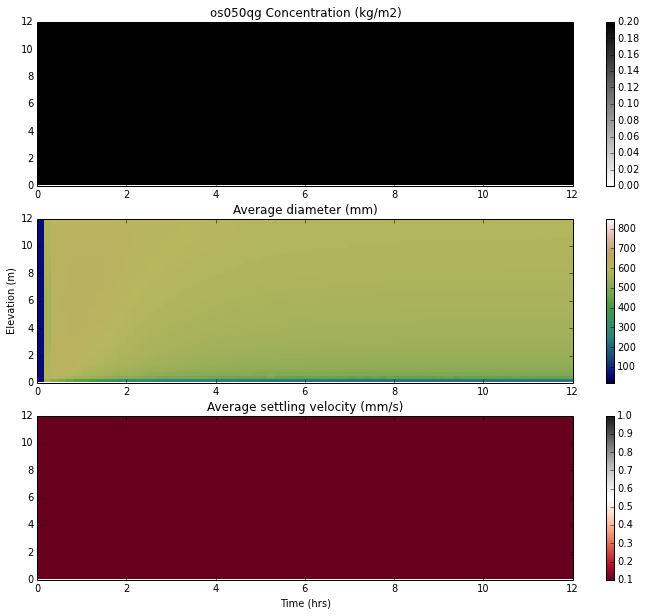

In [6]:
# make 2D arrays of time and depths
t2d = tile(time,(nz,1)).T #2D time(nt, nz)
tw2d = tile(time,(nz+1,1)).T #2D time(nt, nz)
s='shape(zw): {0}\n'.format(shape(zw))
z2d  = tile(h+z.T,(nt,1))
zw2d = tile(h+zw.T,(nt,1))

s=s+'(shape(tw2d): {0}\n'.format(shape(tw2d))
s=s+'(shape(zw2d): {0}\n'.format(shape(zw2d))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)

# calculate size- and settling-velocity weighted floc dists
#print shape(ws)
eps = 1.e-8
ws_av = sum((mud+eps)*ws[0:ncs],2)/sum((mud+eps),2)
fdiam_av = sum((mud+eps)*fdiam[0:ncs],2)/sum((mud+eps),2)

print "shape(ws_av) ",shape(ws_av)
mconc = sum(mud,2);
print "shape(mconc) ",shape(mconc)
cmap = plt.get_cmap('PiYG')
cmap = plt.get_cmap('RdGy')

fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(3,1,1)
cmap = plt.get_cmap('Reds')
cmap = plt.get_cmap('RdGy')
cmap = plt.get_cmap('binary')
pcolormesh(t2d/3600.,z2d,sum(mud,2),cmap=cmap,vmin=0.,vmax=0.2)
plt.title(run_name+' Concentration (kg/m2)')
plt.colorbar()

ax=fig.add_subplot(3,1,2)
cmap = plt.get_cmap('Paired')
cmap = plt.get_cmap('RdGy')
cmap = plt.get_cmap('PuOr')
cmap = plt.get_cmap('gist_earth')
pcolormesh(t2d/3600.,z2d,fdiam_av,cmap=cmap,vmin=20,vmax=850)
plt.ylabel('Elevation (m)')
plt.title('Average diameter (mm)')
plt.colorbar()

ax=fig.add_subplot(3,1,3)
cmap = plt.get_cmap('RdGy')
pcolormesh(t2d/3600.,z2d,ws_av,cmap=cmap,vmin=0.1,vmax=1)
plt.colorbar()
plt.xlabel('Time (hrs)')
plt.title('Average settling velocity (mm/s)')
fig_name = proj_dir+case_dir+'case_'+run_name+'conc_diam_ws.png'
print fig_name
plt.savefig(fig_name)

In [7]:
# report final values
s= "\n"+"i   z    diam    ws     conc"
s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(nz,   z2d[-1,nz-1],  fdiam_av[-1,nz-1], ws_av[-1,nz-1],sum(mud[nt-1,nz-1,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(nz/2, z2d[-1,nz/2], fdiam_av[-1,nz/2], ws_av[-1,nz/2],sum(mud[nt-1,nz/2,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(1,    z2d[-1,1],    fdiam_av[-1,1], ws_av[-1,1],sum(mud[nt-1,1,:],0 ))
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f}"\
.format(0,    z2d[-1,0],    fdiam_av[-1,0], ws_av[-1,0],sum(mud[nt-1,0,:],0 ))
print s
with open( stats_filename, "a") as afile:
    afile.write(s)


i   z    diam    ws     conc
50 11.9  600.4  0.000 0.9999
25  6.3  572.4  0.000 0.9996
 1  0.3  451.2  0.000 1.0000
 0  0.1  228.6  0.000 1.0003


In [8]:
# Replay the contents of the summary txt file
with open( stats_filename, "r") as afile:
    s=afile.read()
print s

D:/crs/proj/flocs/aug_runs/os050qg_summary.txt
URL: http://geoport.whoi.edu/thredds/dodsC/usgs/data1/aretxabaleta/FLOC/gls_qcases/ocean_his_os050qg.nc
N  = len(s_rho): 50, Np = len(s_w) : 51
hc = [ 0.]
Intial zeta: 0.0, max. deviation: 7.12948536424e-14
nt, nz, nzw: 73, 50, 51
Final time: 12.0 hrs.
Shape of fdiam, ws: (16L,), (16L,)Using ncs = 15Shape(mud) = (73L, 50L, 15L)
Intial mass: 12.0 kg/m2. Change: -0.0037
Max. abs. change in mud inventory: 0.0130373123755
shape(zw): (51L,)
(shape(tw2d): (73L, 51L)
(shape(zw2d): (73L, 51L)

i   z    diam    ws     conc
50 11.9  600.4  0.000 0.9999
25  6.3  572.4  0.000 0.9996
 1  0.3  451.2  0.000 1.0000
 0  0.1  228.6  0.000 1.0003


  50
  60
  72
  86
 103
 124
 149
 179
 215
 258
 309
 371
 446
 535
 643
D:/crs/proj/flocs/aug_runs/case_os050qg.png


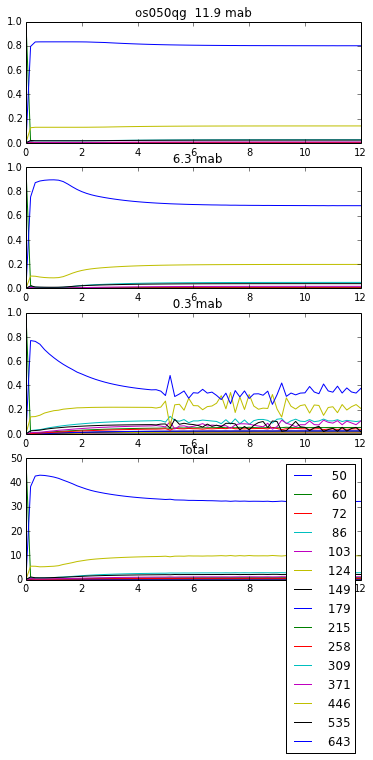

In [9]:
# plot time series of floc classes at various depths
fig = plt.figure(figsize=(6,10))
ax=fig.add_subplot(4,1,1)
j=nz-1
lb = '%(s)5.1f' % {"s":h+z[j]}
for i in range(0,ncs) :
    m = mud[:,j,i]
    plt.plot(time/3600,m,label=lb)
ax.set_title(run_name+' '+lb+' mab')
    
ax=fig.add_subplot(4,1,2)
j=nz/2
lb = '%(s)5.1f' % {"s":h+z[j]}
for i in range(0,ncs) :
    m = mud[:,j,i]
    plt.plot(time/3600,m)
ax.set_title(lb+' mab')
    
ax=fig.add_subplot(4,1,3)
j=1
lb = '%(s)5.1f' % {"s":h+z[j]}
for i in range(0,ncs) :
    m = mud[:,j,i]
    plt.plot(time/3600,m)
ax.set_title(lb+' mab')    
    
ax=fig.add_subplot(4,1,4)
for i in range(0,ncs) :
    m = sum(mud[:,:,i],1)
    lb = '%(s)4d' % {"s":fdiam[i]}
    print lb
    plt.plot(time/3600,m,label=lb)
plt.legend()
ax.set_title('Total')
fig_name = proj_dir+case_dir+'case_'+run_name+'.png'
print fig_name
plt.savefig(fig_name)
    

D:/crs/proj/flocs/aug_runs/case_os050qgfinal_profiles.png


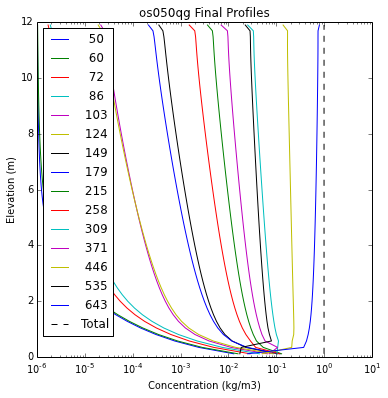

In [10]:
# Final profiles
#print shape(z)
#print shape(mud[nt-1,:,0])
eps = 1e-6
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
# plot individual size classes
for i in range(0,ncs) :
    lb = '%(s)4d' % {"s":fdiam[i]}
    #print lb
    plt.semilogx(mud[nt-1,:,i]+eps,h+z,label=lb)

plt.semilogx( sum(mud[nt-1,:,:],1),h+z,'k--',label='Total')
plt.legend(loc='upper left')
ax.set_title(run_name+' Final Profiles')
plt.ylabel('Elevation (m)')
plt.xlabel('Concentration (kg/m3)')
fig_name = proj_dir+case_dir+'case_'+run_name+'final_profiles.png'
print fig_name
plt.savefig(fig_name)

Background akv_bak =  [  1.00000000e-05]
Background Zob =  [ 0.0005]
D:/crs/proj/flocs/aug_runs/case_os050qgmixing.png


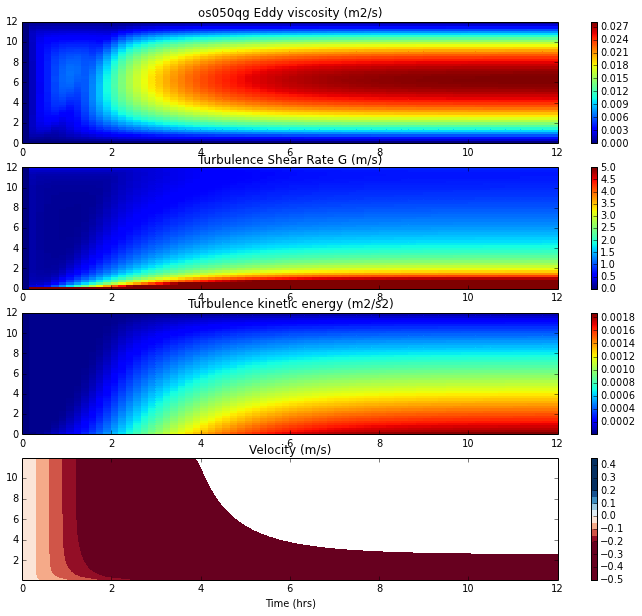

In [11]:
# Calculate and plot turbulence and mixing info
tke = nc.variables['tke'][:,:,3,4]
gls = nc.variables['gls'][:,:,3,4]
akv_bak = nc.variables['Akv_bak'][:]
akt_bak = nc.variables['Akt_bak'][:]
akv = nc.variables['AKv'][:,:,3,4]
nueau =      1.5E-6
gls_p =     -1.000  #gls_p           GLS stability exponent.
gls_m =      0.500  #gls_m           GLS turbulent kinetic energy exponent.
gls_n =     -1.000  #gls_n           GLS turbulent length scale exponent.
gls_cmu0 =   5.4770E-01 #            GLS stability coefficient.
 
exp1 = 3.0+gls_p/gls_n
exp2 = 1.5+gls_m/gls_n
exp3 = -1.0/gls_n
diss = gls_cmu0**exp1*tke**exp2*gls**exp3
Gval=sqrt(diss/nueau)
print 'Background akv_bak = ',akv_bak

#tidx = -1       # just get the final time step, for now.
# read a 3D temperature field at specified time step
#temp = nc.variables['temp'][tidx, :, :, :]
u = nc.variables['u'][:, :, 3, 4]
#v = nc.variables['v'][tidx, :, :, :]

# read a 2D water level (height of ocean surface) at all time steps
#eta = nc.variables['zeta'][:, 3, 4]
# read bottom roughness zoN
zob = nc.variables['Zob'][:]
print 'Background Zob = ',zob
zoa = nc.variables['Zo_app'][:, 3, 4]
if max(zoa) <= 1.e-6 :
    print 'Max zoa = ',max(zoa)
    print 'Replacing with ',zob
    zoa = zob*np.ones_like(zoa)
bustr = nc.variables['bustr'][:, 3, 4]
try:
    bustrcwmax = nc.variables['bustrcwmax'][:, 3, 4]
except :
    print 'bustrcwmax not available, replacing with bustr'
    bustrcwmax = bustr

#bvstr = nc.variables['bvstr'][:, 3, 4]
ubar = nc.variables['ubar'][:, 3, 4]
#vbar = nc.variables['vbar'][:, 3, 4]


fig = plt.figure(figsize=(12,10))
ax=fig.add_subplot(4,1,1)
pcolormesh(tw2d/3600.,zw2d,(akv+akv_bak))
plt.title(run_name+' Eddy viscosity (m2/s)')
plt.colorbar()

ax=fig.add_subplot(4,1,2)
#pcolormesh(tw2d/3600.,zw2d,log10(diss+1.e-8))
#plt.colorbar()
#plt.title('log10[ Dissipation rate (m2/s3) ]')
pcolormesh(tw2d/3600.,zw2d,Gval,vmin=0.,vmax=5.)
plt.colorbar()
plt.title('Turbulence Shear Rate G (m/s)')

ax=fig.add_subplot(4,1,3)
pcolormesh(tw2d/3600.,zw2d,(tke))
plt.title('Turbulence kinetic energy (m2/s2)')
plt.colorbar()

ax=fig.add_subplot(4,1,4)
cmap = plt.get_cmap('Reds')
cmap = plt.get_cmap('RdBu')
#pcolormesh(t2d/3600.,z2d,abs(u),cmap=cmap)
#plt.colorbar()
V = arange(-.5,.5,0.05)
plt.contourf(t2d/3600.,z2d,u,V,cmap=cmap,vmin=-.20,vmax=.20)
plt.colorbar()
plt.xlabel('Time (hrs)')
plt.title('Velocity (m/s)')
fig_name = proj_dir+case_dir+'case_'+run_name+'mixing.png'
print fig_name
plt.savefig(fig_name)

D:/crs/proj/flocs/aug_runs/case_os050qgstress.png


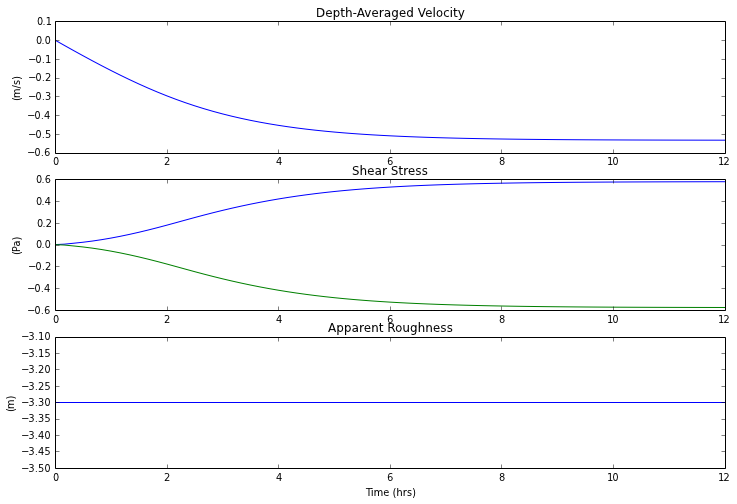

In [12]:
fig = plt.figure(figsize=(12,8))
ax=fig.add_subplot(3,1,1)
plot(time/3600.,ubar)
plt.title('Depth-Averaged Velocity')
plt.ylabel('(m/s)')
ax=fig.add_subplot(3,1,2)
plot(time/3600.,bustr)
plot(time/3600.,bustrcwmax)
plt.title('Shear Stress')
plt.ylabel('(Pa)')
ax=fig.add_subplot(3,1,3)
plot(time/3600.,log10(zoa))
plt.title('Apparent Roughness')
plt.ylabel('(m)')
plt.xlabel('Time (hrs)')

fig_name = proj_dir+case_dir+'case_'+run_name+'stress.png'
print fig_name
plt.savefig(fig_name)

In [13]:
# Calculate G on rho 
Gc = 0.5*(Gval[:,0:50]+Gval[:,1:51])
s = "shape(Gval), shape(Gc): {0}, {1}\n".format(shape(Gval),shape(Gc))
nts = 10
s = s+"Averaging last {0} time steps.\n".format(nts)
print s

ws_av_mn = mean(ws_av[-1-10:-1,:],0)
ws_av_sd = std(ws_av[-1-10:-1,:],0)
fdiam_av_mn = mean(fdiam_av[-1-10:-1,:],0)
fdiam_av_sd = std(fdiam_av[-1-10:-1,:],0)
tconc = sum(mud,2)
tconc_mn = mean(tconc[-1-10:-1,:],0)
tconc_sd = std(tconc[-1-10:-1,:],0)
Gc_mn = mean(Gc[-1-10:-1,:],0)
Gc_sd = std(Gc[-1-10:-1,:],0)
#fdiam_av = sum((mud+eps)*fdiam[0:ncs],2)/sum((mud+eps),2)
#Gc_av = 
print "shape(ws_av_mn):",shape(ws_av_mn)
print "shape(tconc): ",shape(tconc)
print "shape(tconc_mn): ",shape(tconc_mn)

shape(Gval), shape(Gc): (73L, 51L), (73L, 50L)
Averaging last 10 time steps.

shape(ws_av_mn): (50L,)
shape(tconc):  (73L, 50L)
shape(tconc_mn):  (50L,)


In [14]:
# report final values
s= "\nMeans for last {0} timesteps.\ni   z    diam    ws     conc   Gc".format(nts)
s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(nz,   z2d[-1,nz-1],  fdiam_av_mn[nz-1], ws_av_mn[nz-1], tconc_mn[nz-1], Gc_mn[nz-1])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(nz/2, z2d[-1,nz/2], fdiam_av_mn[nz/2], ws_av_mn[nz/2], tconc_mn[nz/2], Gc_mn[nz/2])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(1,    z2d[-1,1],    fdiam_av_mn[1], ws_av_mn[1], tconc_mn[1], Gc_mn[1])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(0,    z2d[-1,0],    fdiam_av_mn[0], ws_av_mn[0], tconc_mn[0], Gc_mn[0])

s=s+"\nStandard Deviations:\ni   z    diam    ws     conc   Gc"
s=s +"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(nz,   z2d[-1,nz-1],  fdiam_av_sd[nz-1], ws_av_sd[nz-1], tconc_sd[nz-1], Gc_mn[nz-1])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(nz/2, z2d[-1,nz/2], fdiam_av_sd[nz/2], ws_av_sd[nz/2], tconc_sd[nz/2], Gc_mn[nz/2])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(1,    z2d[-1,1],    fdiam_av_sd[1], ws_av_sd[1], tconc_sd[1], Gc_sd[1])
s=s+"\n"+"{0:2d} {1:4.1f} {2:6.1f} {3:6.3f} {4:6.4f} {5:8.3}"\
.format(0,    z2d[-1,0],    fdiam_av_sd[0], ws_av_sd[0], tconc_sd[0], Gc_sd[0])
print s
with open( stats_filename, "a") as afile:
    afile.write(s)


Means for last 10 timesteps.
i   z    diam    ws     conc   Gc
50 11.9  600.5  0.000 0.9999    0.668
25  6.3  572.5  0.000 0.9996     1.32
 1  0.3  450.3  0.000 0.9993     8.46
 0  0.1  228.5  0.000 0.9996 1.09e+02
Standard Deviations:
i   z    diam    ws     conc   Gc
50 11.9    0.0  0.000 0.0001    0.668
25  6.3    0.0  0.000 0.0003     1.32
 1  0.3    2.7  0.000 0.0010  0.00742
 0  0.1    0.3  0.000 0.0011   0.0945


D:/crs/proj/flocs/aug_runs/case_os050qgwinterwerp.png


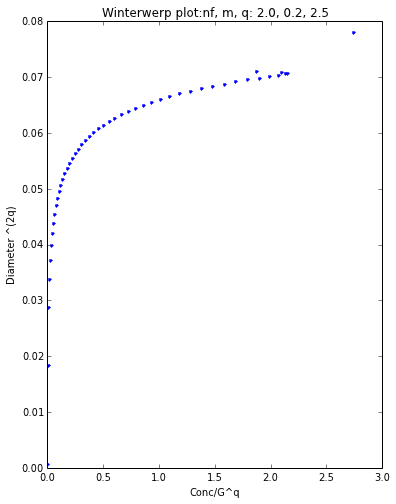

In [15]:
nf = 2.
m = .2
q = (nf-1.)/(2.*m)
s= "nf, m, q: {0}, {1}, {2}".format(nf, m, q)
fig = plt.figure(figsize=(6,8))
plot(tconc_mn/Gc_mn**q,(1e-3*fdiam_av_mn)**(2*q),'.')
plt.title('Winterwerp plot:'+ s)
plt.ylabel('Diameter ^(2q)')
plt.xlabel(r'Conc/G^q')
fig_name = proj_dir+case_dir+'case_'+run_name+'winterwerp.png'
print fig_name
plt.savefig(fig_name)

D:/crs/proj/flocs/aug_runs/case_os050qgdiam_v_G.png


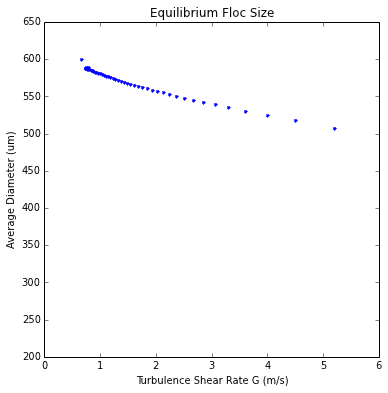

In [16]:
fig = plt.figure(figsize=(6,6))
#ax=fig.add_subplot(1,2,1)
plt.title('Equilibrium Floc Size')
plt.ylabel('Average Diameter (um)')
plt.xlabel(r'Turbulence Shear Rate G (m/s)')
plot(Gc_mn,fdiam_av_mn,'.')
plt.xlim([0, 6])
fig_name = proj_dir+case_dir+'case_'+run_name+'diam_v_G.png'
print fig_name
plt.savefig(fig_name)

savetxt(proj_dir+case_dir+run_name+'gc.txt',Gc_mn)
savetxt(proj_dir+case_dir+run_name+'diam.txt',fdiam_av_mn)
savetxt(proj_dir+case_dir+run_name+'ws.txt',ws_av_mn)
savetxt(proj_dir+case_dir+run_name+'mconc.txt',tconc_mn)

In [17]:
# plot results from several runs
# read data from GLS run, which has diffusivity for conc enabled
flist = ['os050qg','os051qg','os052qg','os053qg','os054qg']
i=0
G=zeros( (len(flist),len(Gc_mn)) )
d=zeros_like(G)
c=zeros_like(G)
ws=zeros_like(G)
for run_name in flist:
    G[i,:] =loadtxt(proj_dir+case_dir+run_name+'gc.txt')
    d[i,:]=loadtxt(proj_dir+case_dir+run_name+'diam.txt')
    ws[i,:]=loadtxt(proj_dir+case_dir+run_name+'ws.txt')
    c[i,:]=loadtxt(proj_dir+case_dir+run_name+'mconc.txt')
    i=i+1

D:/crs/proj/flocs/aug_runs/case_os054qgmultiple.png


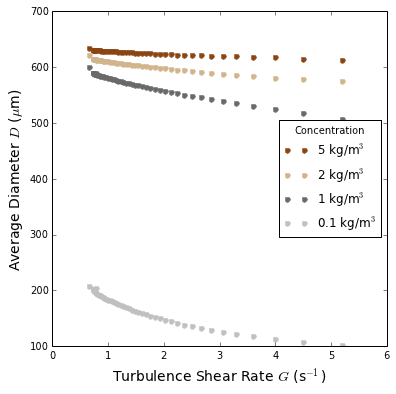

In [26]:
# plot all results
fig = plt.figure(figsize=(6,6))
msize=10
#plt.title(r'Equilibrium Floc Size',fontsize=16)
plt.ylabel(r'Average Diameter $D$ ($\mu$m)',fontsize=14)
plt.xlabel(r'Turbulence Shear Rate $G$ (s$^{-1}$)',fontsize=14)
#plot(G[0,:],d[0,:],'.',markersize=10,label="1 kg/m^3")
plot(G[3,:],d[3,:],'.',ms=msize,c='SaddleBrown',label="5 kg/m$^3$")
plot(G[2,:],d[2,:],'.',ms=msize,c='Tan',label="2 kg/m$^3$")
plot(G[1,:],d[1,:],'.',ms=msize,c='DimGray',label="1 kg/m$^3$")
plot(G[4,:],d[4,:],'.',ms=msize,c='Silver',label="0.1 kg/m$^3$")
plt.legend(loc='center right',title='Concentration')
plt.xlim([0, 6])
plt.ylim([100,700])
fig_name = proj_dir+case_dir+'case_'+run_name+'multiple.png'
print fig_name
plt.savefig(fig_name)

nf, m, q: 2.0, 0.2, 2.5
D:/crs/proj/flocs/aug_runs/case_os054qgwinterwerp_multiple.png


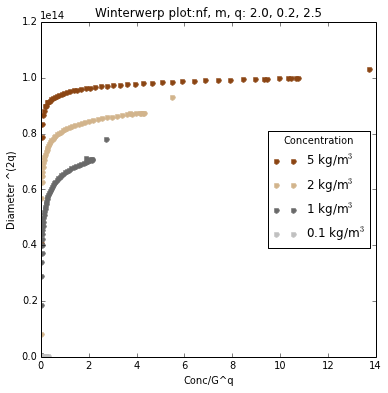

In [22]:
nf = 2.
m = .2
q = (nf-1.)/(2.*m)

s= "nf, m, q: {0}, {1}, {2}".format(nf, m, q)
print s
fig = plt.figure(figsize=(6,6))
#plot(tconc_mn/Gc_mn**q,(1e-3*fdiam_av_mn)**(2*q),'.')
#plot( c[0]/G[0]**q, (1e-3*d[0])**(2.*q),'.',label="1 kg/m^3")
plot( c[3]/G[3]**q, (d[3])**(2.*q),'.',ms=msize,c='SaddleBrown',label="5 kg/m$^3$")
plot( c[2]/G[2]**q, (d[2])**(2.*q),'.',ms=msize,c='Tan',label="2 kg/m$^3$")
plot( c[1]/G[1]**q, (d[1])**(2.*q),'.',ms=msize,c='DimGray',label="1 kg/m$^3$")
plot( c[4]/G[4]**q, (d[4])**(2.*q),'.',ms=msize,c='Silver',label="0.1 kg/m$^3$")
plt.title('Winterwerp plot:'+ s)
plt.ylabel('Diameter ^(2q)')
plt.xlabel(r'Conc/G^q')
plt.legend(loc='center right',title='Concentration')
fig_name = proj_dir+case_dir+'case_'+run_name+'winterwerp_multiple.png'
print fig_name
plt.savefig(fig_name)
